In [1]:
import numpy as np
import pandas as pd,os
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
import scikit_posthocs as sp

## Notes
+ NB tops ranking with both metrics for Noisy data
+ RF & LR (both simple & balanced) tops for Clean datasets. Interestingly, simple methods without imbalanced technique (RF & LR) performs better than rest.

In [67]:
noise = pd.read_csv("Imb X Clf-Noisy.csv",header=[0,1,2],index_col=0)
clean = pd.read_csv("Imb X Clf-Clean.csv",header=[0,1,2],index_col=0)
df = clean - noise
boo = "CvsN"

In [68]:
tmp = df.drop(columns=['pr_rec_score'],axis=1,level=2)
tmp

imb                                            smote                    \
clf                                               dt                lr   
metric                             matthews_corrcoef matthews_corrcoef   
activemq-5.8.0.csv                          0.030069          0.038991   
groovy-1_6_BETA_1.csv                       0.084642          0.137262   
activemq-5.3.0.csv                          0.009070          0.010731   
wicket-1.3.0-incubating-beta-1.csv          0.086530          0.152533   
jruby-1.1.csv                               0.054488          0.000344   
jruby-1.4.0.csv                             0.120765          0.036631   
lucene-2.3.0.csv                            0.251054          0.231749   
hbase-0.95.2.csv                            0.149592          0.215749   
lucene-3.0.0.csv                            0.154368          0.073828   
camel-2.9.0.csv                             0.062434          0.049124   
wicket-1.5.3.csv                            0.074565          0.075168   
lucene-3.1.csv                             -0.013737         -0.016170   
groovy-1_6_BETA_2.csv                       0.142625          0.119016   
activemq-5.2.0.csv                          0.183765          0.099529   
groovy-1_5_7.csv                            0.134949          0.068533   
hbase-0.95.0.csv                            0.252444          0.163340   
camel-2.11.0.csv                            0.020908          0.061289   
jruby-1.7.0.preview1.csv                    0.032503          0.071451   
hive-0.10.0.csv                             0.225249          0.178735   
camel-2.10.0.csv                            0.082842          0.060585   
derby-10.2.1.6.csv                          0.252471          0.231770   
jruby-1.5.0.csv                             0.058609          0.084728   
derby-10.3.1.4.csv                          0.193214          0.101658   
lucene-2.9.0.csv                            0.109898          0.018230   
hbase-0.94.0.csv                            0.152483          0.161242   
camel-1.4.0.csv                             0.131986          0.113013   
activemq-5.1.0.csv                         -0.009315          0.030014   
activemq-5.0.0.csv                          0.225394          0.140138   
derby-10.5.1.1.csv                          0.053956          0.044923   
wicket-1.3.0-beta2.csv                      0.016882          0.074493   
hive-0.12.0.csv                             0.291169          0.202841   
hive-0.9.0.csv                              0.284269          0.123506   

imb                                                                     \
clf                                               nb               knn   
metric                             matthews_corrcoef matthews_corrcoef   
activemq-5.8.0.csv                          0.000556          0.050539   
groovy-1_6_BETA_1.csv                       0.043216          0.106709   
activemq-5.3.0.csv                         -0.002052         -0.064113   
wicket-1.3.0-incubating-beta-1.csv          0.020368          0.114588   
jruby-1.1.csv                               0.076981          0.039538   
jruby-1.4.0.csv                            -0.015520          0.077624   
lucene-2.3.0.csv                            0.154875          0.200393   
hbase-0.95.2.csv                            0.019538          0.126406   
lucene-3.0.0.csv                            0.012307          0.073890   
camel-2.9.0.csv                            -0.010739          0.023207   
wicket-1.5.3.csv                            0.042814          0.038710   
lucene-3.1.csv                             -0.018274          0.025750   
groovy-1_6_BETA_2.csv                       0.028170          0.040415   
activemq-5.2.0.csv                          0.027568          0.096575   
groovy-1_5_7.csv                            0.033948          0.103794   
hbase-0.95.0.csv                            0.036784          0.278481   
cam

In [69]:
mat = tmp.droplevel(2,axis=1)
print(mat.shape)

(32, 26)


In [72]:
rank = mat.copy()
for d in mat.index:
    rank.loc[d] = rankdata(mat.loc[d])

In [73]:
rank.mean().sort_values().to_csv(f"figures/{boo} Comb Rank.csv")
rank.mean().sort_values()

/home/shihab/anaconda3/envs/ana/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


imb     clf      
wilson  nb            5.18750
ens     bbag_NB       5.21875
rus     nb            5.65625
tomek   nb            5.75000
smote   nb            5.81250
ens     rboost_NB     7.15625
rus     knn          12.03125
        dt           12.18750
        rf           12.75000
ens     rboost_DT    13.00000
rus     lr           13.09375
wilson  lr           14.15625
        dt           15.59375
tomek   knn          15.71875
smote   knn          15.71875
wilson  knn          15.81250
tomek   dt           15.84375
smote   lr           15.90625
ens     bbag_DT      16.62500
sim     LR           17.21875
smote   dt           17.31250
tomek   lr           17.40625
wilson  rf           18.00000
sim     RF           18.21875
smote   rf           19.75000
tomek   rf           19.87500
dtype: float64

In [74]:
rank.mean(level=0,axis=1).mean()

imb
smote     14.90000
rus       11.14375
wilson    13.75000
tomek     14.91875
ens       10.50000
sim       17.71875
dtype: float64

In [75]:
rank.mean(level=1,axis=1).mean()

clf
dt           15.234375
lr           15.140625
nb            5.601562
knn          14.820312
rf           17.593750
rboost_DT    13.000000
rboost_NB     7.156250
bbag_DT      16.625000
bbag_NB       5.218750
LR           17.218750
RF           18.218750
dtype: float64

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

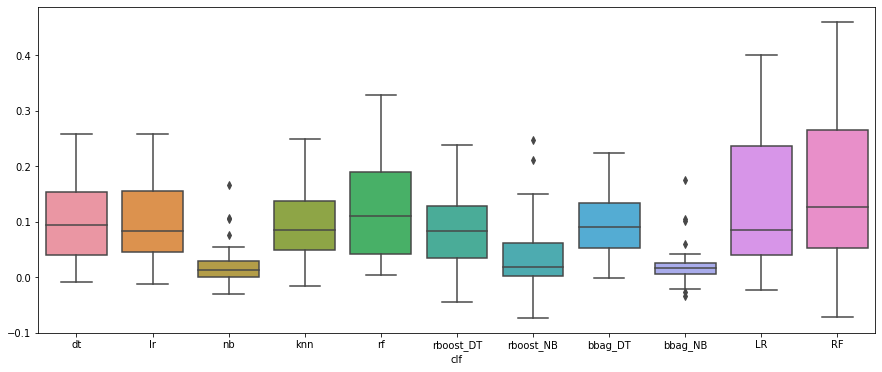

In [79]:
plt.figure(figsize=(15,6))
fig = sns.boxplot(data=mat.mean(level=1,axis=1));
fig.get_figure().savefig(f"figures/{boo}_clf_rank.svg",format='svg');

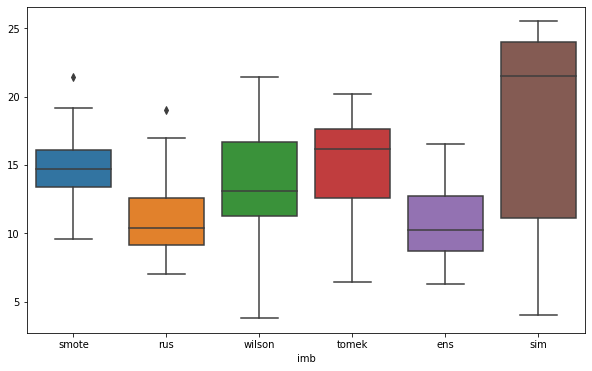

In [80]:
plt.figure(figsize=(10,6))
fig = sns.boxplot(data=rank.mean(level=0,axis=1));
fig.get_figure().savefig(f"figures/{boo}_imb_rank.svg",format='svg');